In [3]:
import torch
from torch_geometric.data import Data
from src.data.preprocessing import create_adjacency_matrix, normalize_adjacency_matrix, regularize_normalized_adjacency_matrix
from src.utils.visualization import visualize_graph
from src.models.cgnn import CGNN

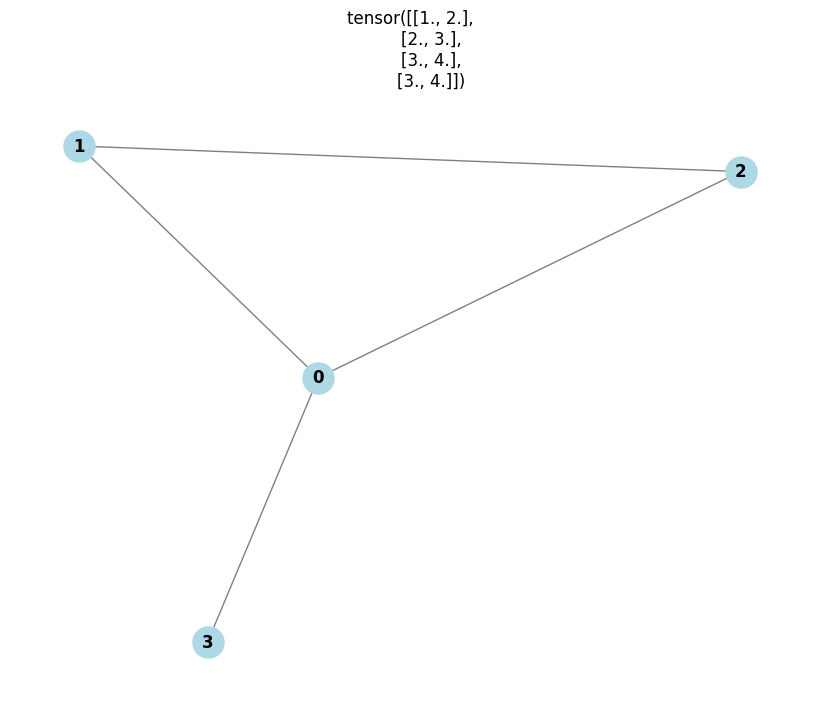

In [4]:

edge_index = torch.tensor([[0, 1, 2, 3],
                           [1, 2, 0, 0]], dtype=torch.long)
x = torch.tensor([[1.0, 2.0], [2.0, 3.0], [3.0, 4.0], [3.0, 4.0]], dtype=torch.float)
y = torch.tensor([0, 1, 0, 0], dtype=torch.long)
data = Data(x=x, edge_index=edge_index, y=y)

num_nodes = data.num_nodes
adj_matrix = create_adjacency_matrix(data.edge_index, num_nodes)
norm_adj_matrix = normalize_adjacency_matrix(adj_matrix)
a = 0.5
reg_norm_adj_matrix = regularize_normalized_adjacency_matrix(norm_adj_matrix, a)

visualize_graph(adj_matrix, data.x)


In [5]:
print("Матрица смежности:")
print(adj_matrix)
print("Нормализованная матрица смежности:")
print(norm_adj_matrix)
print("Регуляризованная нормализованная матрица смежности:")
print(reg_norm_adj_matrix)


Матрица смежности:
[[0. 1. 1. 1.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 0.]]
Нормализованная матрица смежности:
[[0.25       0.28867513 0.28867513 0.35355339]
 [0.28867513 0.33333333 0.33333333 0.        ]
 [0.28867513 0.33333333 0.33333333 0.        ]
 [0.35355339 0.         0.         0.5       ]]
Регуляризованная нормализованная матрица смежности:
[[0.3125     0.07216878 0.07216878 0.08838835]
 [0.07216878 0.33333333 0.08333333 0.        ]
 [0.07216878 0.08333333 0.33333333 0.        ]
 [0.08838835 0.         0.         0.375     ]]


In [6]:
print("Начальные признаки узлов:")
print(data.x)

input_dim = data.x.shape[1]
hidden_dim = 16
output_dim = 2
model = CGNN(input_dim, hidden_dim, output_dim)

initial_representation = model(data.x, data.edge_index)

print("Начальное представление узлов после нейронного кодировщика:")
print(initial_representation)

Начальные признаки узлов:
tensor([[1., 2.],
        [2., 3.],
        [3., 4.],
        [3., 4.]])
Начальное представление узлов после нейронного кодировщика:
tensor([[0.1908, 1.0597, 0.0000, 0.0000, 0.0528, 0.9392, 0.0000, 1.2510, 0.9982,
         2.2277, 0.0000, 0.0458, 1.0729, 0.0000, 0.0000, 0.7186],
        [0.0000, 2.1058, 0.0000, 0.0000, 0.3459, 1.2553, 0.0000, 1.7117, 1.7958,
         3.4236, 0.0000, 0.0221, 1.6082, 0.0000, 0.0000, 0.8056],
        [0.0000, 3.1519, 0.0000, 0.0000, 0.6389, 1.5714, 0.0000, 2.1725, 2.5934,
         4.6194, 0.0000, 0.0000, 2.1434, 0.0000, 0.0000, 0.8927],
        [0.0000, 3.1519, 0.0000, 0.0000, 0.6389, 1.5714, 0.0000, 2.1725, 2.5934,
         4.6194, 0.0000, 0.0000, 2.1434, 0.0000, 0.0000, 0.8927]],
       grad_fn=<ReluBackward0>)
